In [1]:
pip install cryptography --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from utilities.data_manager import DataManager
from utilities.backtest_analysis import BacktestAnalysis
from strategies import MACDcross as strat

/home/spoonbill/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
data = DataManager(name="binance")  # "bitget"

In [4]:
symbol = "BTC/USDT" #"BTC/USDT:USDT"
ohlcv = data.load(symbol, timeframe="1d", start_date="2024-01-01") #start_date="2024-01-01 00:00:00")
'''
# Envelope Strategy
strategy_params = {
    'average_type': 'SMA',  # 'SMA', 'EMA', 'WMA', 'DCM'
    'average_period': 6,
    'envelopes': [0.07, 0.11, 0.14],
    'stop_loss_pct': 0.3,
    # 'price_jump_pct': 0.3,
    #'position_size_percentage': 100,  #  % of the balance spread equally across each envelope
     'position_size_fixed_amount': 1000,  # fixed amount spread equally across each envelope
    # 'mode': "long", "short", 'both' (default)
}
'''

strategy_params = {
    'fast_ma': 50,  # Fast MACD period (default: 12)
    'slow_ma': 200,  # Slow MACD period (default: 26)
    'signal_ma': 12,  # Signal line period (default: 9)
    'stop_loss_pct': 0.3,  # Stop-loss percentage (same as before)
    'position_size_fixed_amount': 1000,  # Fixed position size per trade
    # 'position_size_percentage': 100,  # % of balance (optional alternative)
    # 'mode': "long", "short", 'both' (default)
}

strategy = strat.Strategy(strategy_params, ohlcv)
strategy.run_backtest(initial_balance=1000, leverage=1, open_fee_rate=0.0002, close_fee_rate=0.0006)

In [5]:
results = BacktestAnalysis(strategy)
results.print_metrics()
# path = "..."
# results.print_metrics(path)

--- General ---
Period: [2024-01-01 00:00:00] -> [2025-08-13 00:00:00]
Initial balance: 1000.0 $
Final balance: 816.11 $
Performance: -18.39 %
Hodl performance: 179.1%
Performance/Hodl: -70.76 %
Total trades: 5
Time in position: 29.66 %

--- Health ---
Win rate: 20.0 %
Max drawdown at trade close: -14.81 %
Max drawdown at equity update: -26.48 %
Profit factor: 0.32
Return over max drawdown: -0.69
Sharpe ratio: -0.33
Sortino ratio: -0.26
Calmar ratio: -0.34

--- Trades ---
Average net PnL: -3.68 %
Average trades per day: 0.008
Average trades duration: 35 days 00:00:00
Best trade: +8.69 % entered 2025-01-31 00:00:00 exited 2025-04-22 00:00:00
Worst trade: -11.45 % entered 2024-12-28 00:00:00 exited 2025-01-21 00:00:00
Total winning trades: 1
Total loosing trades: 4
Average net PnL winning trades: 8.69 %
Average net PnL loosing trades: -6.77 %
Mean winning trades duration: 81 days 00:00:00
Mean loosing trades duration: 23 days 12:00:00
Max win streak: 1
Max lose streak: 2
Open reasons:
Op

In [6]:
strategy.trades_info
# path = symbol.replace('/', '-').replace(':', '-') 
# strategy.save_trades_info(path)

,open_time,close_time,open_reason,close_reason,open_price,close_price,initial_margin,net_pnl,net_pnl_pct,open_notional_value,close_notional_value,amount,open_fee,close_fee,sl_price,liquidation_price,open_balance,close_balance
0,2024-08-03,2024-09-20,Open short,MACD Golden Cross,60697.99,63201.05,1000,-42.004833,-4.200483,999.8,958.570309,0.016472,0.2,0.575142,78907.387,121395.98,0.000000,957.995167
1,2024-12-28,2025-01-21,Open short,MACD Golden Cross,95300.00,106143.82,1000,-114.495014,-11.449501,999.8,886.036608,0.010491,0.2,0.531622,123890.000,190600.00,-42.004833,843.500153
2,2025-01-31,2025-04-22,Open short,MACD Golden Cross,102429.56,93442.99,1000,86.864089,8.686409,999.8,1087.516599,0.009761,0.2,0.652510,133158.428,204859.12,-156.499847,930.364242
3,2025-06-20,2025-07-03,Open short,MACD Golden Cross,103297.99,109584.78,1000,-61.611918,-6.161192,999.8,938.951453,0.009679,0.2,0.563371,134287.387,206595.98,-69.635758,868.752324
4,2025-08-03,2025-08-12,Open short,MACD Golden Cross,114208.80,120134.08,1000,-52.639497,-5.263950,999.8,947.929260,0.008754,0.2,0.568758,148471.440,228417.60,-131.247676,816.112827


In [7]:
strategy.equity_record
# strategy.save_equity_record(path)

,price,equity
time,,
2024-01-01,44179.55,1000.000000
2024-01-02,44946.91,1000.000000
2024-01-03,42845.23,1000.000000
2024-01-04,44151.10,1000.000000
2024-01-05,44145.11,1000.000000
...,...,...
2025-08-09,116462.25,848.237260
2025-08-10,119294.01,823.462506
2025-08-11,118686.00,828.781918


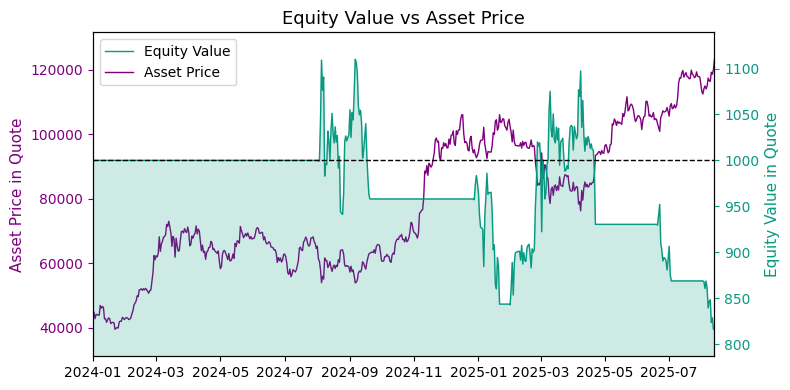

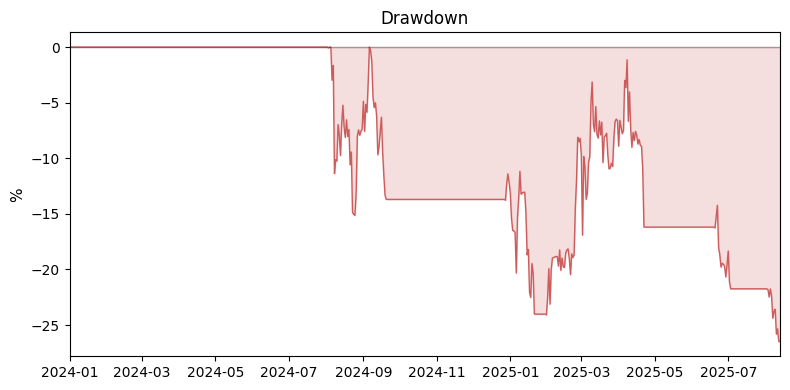

In [8]:
results.plot_equity()
# results.plot_equity(path)

results.plot_drawdown()
# results.plot_drawdown(path)

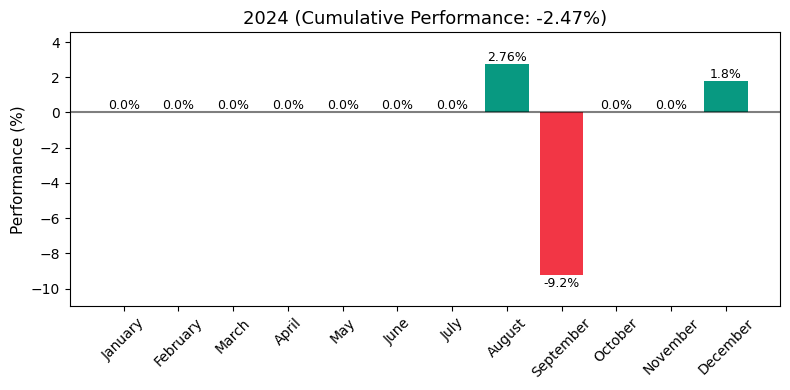

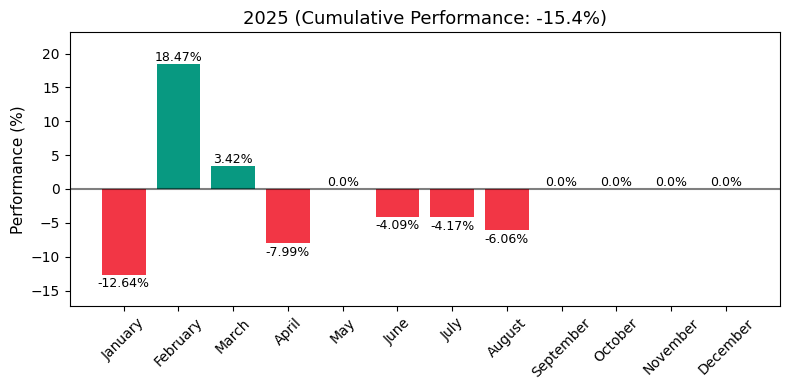

In [9]:
results.plot_monthly_performance(year="all")
# results.plot_monthly_performance(year="all", path)

In [10]:
indicators = {
    'average': {
        'color': "white",
        'df': pd.DataFrame({
            'time': strategy.data.index,
            'average': strategy.data['average'],
        }).dropna()        
    } 
}

for i, e in enumerate(strategy_params['envelopes']):
    indicators.update({
        f'band_high_{i+1}' : {
            'color': "red",
            'df': pd.DataFrame({
                'time': strategy.data.index,
                f'band_high_{i+1}': strategy.data[f'band_high_{i+1}'],
            }).dropna()   
        },
        f'band_low_{i+1}' : {
            'color': "green",
            'df': pd.DataFrame({
                'time': strategy.data.index,
                f'band_low_{i+1}': strategy.data[f'band_low_{i+1}'],
            }).dropna()  
        },
    })

results.plot_candlestick(indicators=indicators)

KeyError: 'average'